In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
raw_data = pd.read_csv('Data/bank/bank.csv', sep=';') # Đọc dữ liệu, tách các thuộc tính bằng ";"
print('Shape =', raw_data.shape)
# Dữ liệu có 4521 đối tượng, 16 thuộc tính và 1 thuộc tính phân lớp.
raw_data.info()
raw_data.head()

Shape = (4521, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
raw_data = raw_data.drop(columns='duration')
raw_data.info()
# Dữ liệu có 4521 đối tượng, 15 thuộc tính và 1 thuộc tính phân lớp.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 565.2+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder # Chuyển thuộc tính dạng category thành số.
def categoryToInt(data: pd.DataFrame):
    listAttrCate = ['job', 'marital', 'education', 'default', 'housing', 'month', 'loan', 'contact', 'poutcome', 'y']
    new_data = data.copy()
    LE = LabelEncoder()
    for attr in listAttrCate:
        new_data[attr] = LE.fit_transform(new_data[attr])
    return new_data

new_data = categoryToInt(raw_data)
new_data.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,2,176,3,0,0
6,36,6,1,2,0,307,1,0,0,14,8,1,330,2,1,0
7,39,9,1,1,0,147,1,0,0,6,8,2,-1,0,3,0
8,41,2,1,2,0,221,1,0,2,14,8,2,-1,0,3,0
9,43,7,1,0,0,-88,1,1,0,17,0,1,147,2,0,0


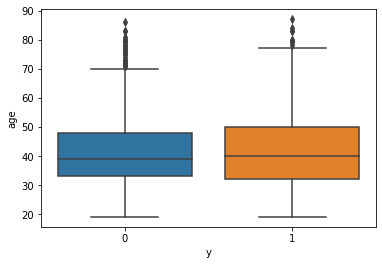

In [5]:
# Kiểm tra outlier
# raw_data.boxplot(column='balance', return_type='axes')
import seaborn as sns
sns.boxplot(x='y', y='age', data=new_data)

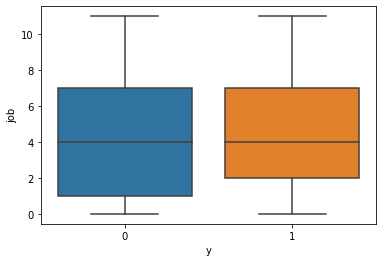

In [6]:
sns.boxplot(x='y', y='job', data=new_data)

In [23]:
from scipy import stats

z = np.abs(stats.zscore(new_data))
print(z)

[[1.05626965 1.71680374 0.24642938 ... 0.32041282 0.44441328 0.36090165]
 [0.77258281 0.79524562 0.24642938 ... 2.04173372 2.57996071 0.36090165]
 [0.58345826 0.12631251 1.42139579 ... 0.27012381 2.57996071 0.36090165]
 ...
 [1.49691189 1.4096177  0.24642938 ... 0.32041282 0.44441328 0.36090165]
 [1.24539421 1.04787063 0.24642938 ... 1.45119709 1.57183605 0.36090165]
 [0.26760226 0.74068459 1.42139579 ... 3.81334363 1.57183605 0.36090165]]


In [24]:
revmove_outlier_data = new_data[(z < 3).all(axis=1)]
revmove_outlier_data.shape
# 4521-3986=535

(3986, 16)

In [25]:
X = revmove_outlier_data.values[:,:-1]
y = revmove_outlier_data.values[:,-1:].flatten()# flatten copy còn ravel không copy
listAttrName = revmove_outlier_data.columns.tolist() # lấy danh sách tên thuộc tính (vẽ trong decision tree)
print('X[0]: ', *X[0])
print('len X[0]: ', len(X[0]))
print('Class 0: ', len(y[y==0]))
print('Class 1: ', len(y[y==1]))

X[0]:  30 10 1 0 0 1787 0 0 0 19 10 1 -1 0 3
len X[0]:  15
Class 0:  3551
Class 1:  435


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 3986 lấy 10% là test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print('X_train[0] : ', *X_train[0])

(3587, 15)
(399, 15)
(3587,)
(399,)
X_train[0] :  31 4 1 2 0 1170 0 0 0 20 1 4 -1 0 3


In [27]:
## https://stackoverflow.com/questions/51237635/difference-between-standard-scaler-and-minmaxscaler#:~:text=StandardScaler%20removes%20the%20mean%20and%20scales%20the%20data%20to%20unit%20variance.&text=MinMaxScaler%20rescales%20the%20data%20set,the%20transformed%20number%20of%20households.
## https://stackoverflow.com/questions/49444262/normalize-data-before-or-after-split-of-training-and-testing-data
# Scale sau bước train_test_split để không rò rỉ dữ liệu?

#Scale MinMax
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
# scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print('X_train[0] : ', *X_train[0], sep='\t') # Có thể so sánh với đối tượng X_train thứ 0 ở trên trước khi scale

X_train[0] : 	0.22641509433962265	0.36363636363636365	0.5	0.6666666666666666	0.0	0.24051468162322664	0.0	0.0	0.0	0.6333333333333333	0.09090909090909091	0.2727272727272727	0.0	0.0	1.0


In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression(max_iter=10000)
model = model.fit(X_train, y_train)
y_pred_logistic = model.predict(X_test)
# print('y_pred_logistic:\n', y_pred_logistic)
acc_score_logistic = metrics.accuracy_score(y_pred_logistic, y_test)
print('accuracy:\n', acc_score_logistic*100)

accuracy:
 89.47368421052632


In [28]:
#Logistic Regression scale
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression(max_iter=10000)
model = model.fit(X_train, y_train)
y_pred_logistic = model.predict(X_test)
# print('y_pred_logistic:\n', y_pred_logistic)
acc_score_logistic = metrics.accuracy_score(y_pred_logistic, y_test)
print('accuracy:\n', acc_score_logistic*100)

accuracy:
 25.81453634085213


accuracy:
 90.22556390977444


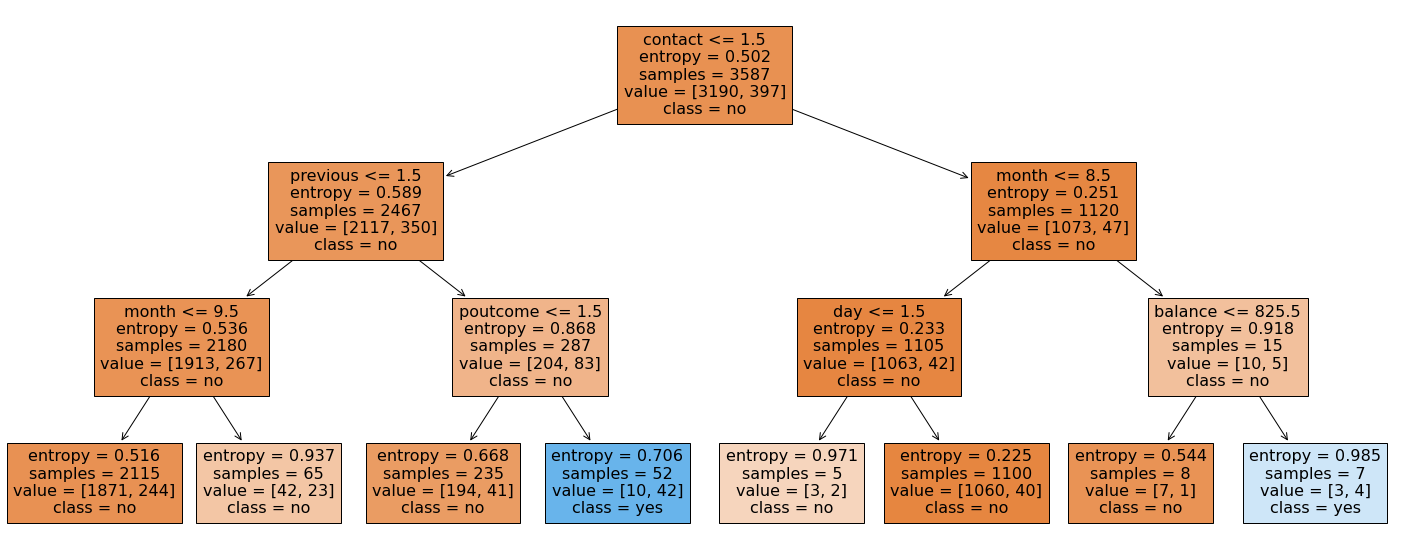

In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = model.fit(X_train, y_train)
y_pred_dtree3 = model.predict(X_test)
print('accuracy:\n', metrics.accuracy_score(y_test, y_pred_dtree3)*100)

# text_representation = tree.export_text(model)
# print(text_representation)

fig = plt.figure(figsize=(25,10))
# _ = tree.plot_tree(model, feature_names=listAttrName, class_names=True, filled=True)
_ = tree.plot_tree(model, feature_names=listAttrName, class_names=['no', 'yes'], filled=True)

accuracy:
 63.65914786967418


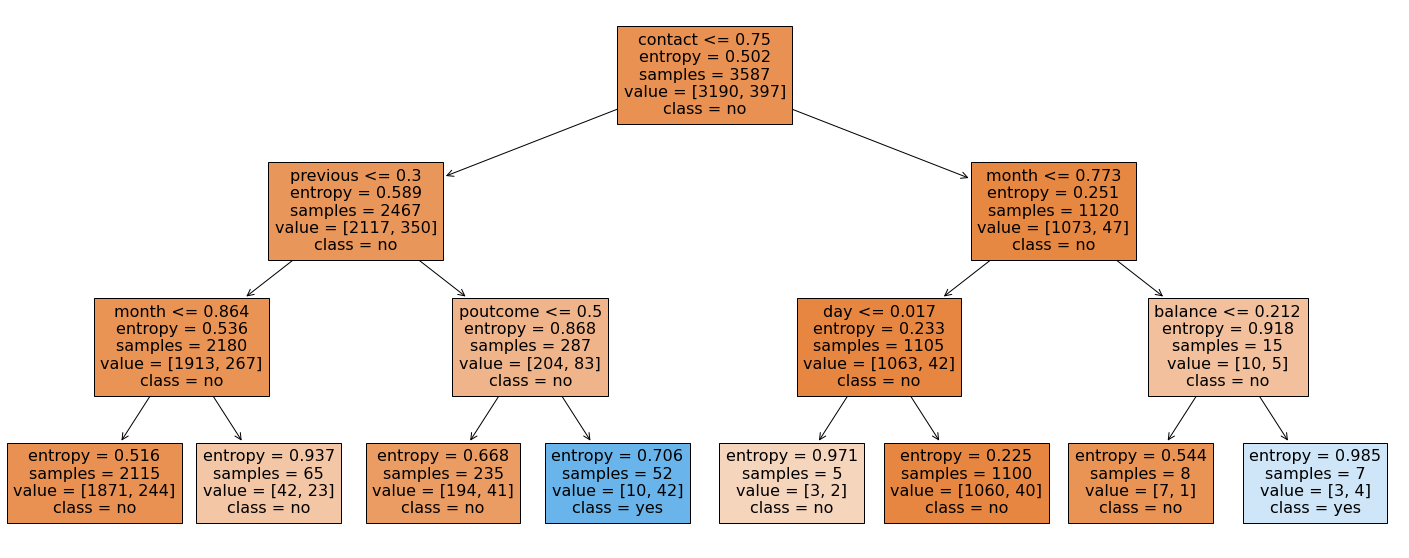

In [29]:
#Decision Tree scale
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model = model.fit(X_train, y_train)
y_pred_dtree3 = model.predict(X_test)
print('accuracy:\n', metrics.accuracy_score(y_test, y_pred_dtree3)*100)

# text_representation = tree.export_text(model)
# print(text_representation)

fig = plt.figure(figsize=(25,10))
# _ = tree.plot_tree(model, feature_names=listAttrName, class_names=True, filled=True)
_ = tree.plot_tree(model, feature_names=listAttrName, class_names=['no', 'yes'], filled=True)

In [40]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_NB = model.predict(X_test)
#Tính accuracy
print('accuracy:\n', metrics.accuracy_score(y_pred_NB, y_test)*100)

accuracy:
 82.70676691729322


In [30]:
# Naive Bayes scale
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_NB = model.predict(X_test)
#Tính accuracy
print('accuracy:\n', metrics.accuracy_score(y_pred_NB, y_test)*100)


accuracy:
 9.523809523809524


In [70]:
#Phan loai voi KNN
from sklearn.neighbors import KNeighborsClassifier
k = 2
acc_score = 0
acc_score_after = 1
while abs(acc_score_after - acc_score) >= 10**(-6):
    acc_score_after = acc_score
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
#     print('y_pred:\n', *y_pred)
#     print('y_true:\n', *y_test)

    #Tính accuracy
    acc_score = metrics.accuracy_score(y_pred, y_test)
    print('accuracy:\n', acc_score*100)
    print('k = ', k)
    k+=1
print('y_pred:\n', *y_pred)
print('y_true:\n', *y_test)


accuracy:
 89.47368421052632
k =  2
accuracy:
 87.21804511278195
k =  3
accuracy:
 90.22556390977444
k =  4
accuracy:
 88.97243107769424
k =  5
accuracy:
 89.47368421052632
k =  6
accuracy:
 89.22305764411027
k =  7
accuracy:
 89.97493734335839
k =  8
accuracy:
 89.97493734335839
k =  9
y_pred:
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1

In [31]:
#Phan loai voi KNN scale
from sklearn.neighbors import KNeighborsClassifier
k = 2
acc_score = 0
acc_score_after = 1
while abs(acc_score_after - acc_score) >= 10**(-6):
    acc_score_after = acc_score
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
#     print('y_pred:\n', *y_pred)
#     print('y_true:\n', *y_test)

    #Tính accuracy
    acc_score = metrics.accuracy_score(y_pred, y_test)
    print('accuracy:\n', acc_score*100)
    print('k = ', k)
    k+=1
print('y_pred:\n', *y_pred)
print('y_true:\n', *y_test)


accuracy:
 90.47619047619048
k =  2
accuracy:
 89.47368421052632
k =  3
accuracy:
 90.47619047619048
k =  4
accuracy:
 90.22556390977444
k =  5
accuracy:
 90.72681704260651
k =  6
accuracy:
 89.72431077694235
k =  7
accuracy:
 90.47619047619048
k =  8
accuracy:
 90.22556390977444
k =  9
accuracy:
 90.47619047619048
k =  10
accuracy:
 90.22556390977444
k =  11
accuracy:
 90.47619047619048
k =  12
accuracy:
 90.47619047619048
k =  13
y_pred:
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [41]:
#svm
import time
from sklearn import svm
from sklearn import metrics

svm_classifier = svm.SVC(kernel='linear', gamma=0.01, C=100.)
start_time = time.time()
svm_classifier.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

y_pred_svm = svm_classifier.predict(X_test)
print('y_pred_svm:\n', *y_pred_svm)
print('y_true:\n', *y_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm, y_test)
print('accuracy:\n', acc_score_svm*100)
# 3069/60=51.15m

--- 3069.2929739952087 seconds ---
y_pred_svm:
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
y_true:
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

In [32]:
#svm scale
import time
from sklearn import svm
from sklearn import metrics
svm_classifier = svm.SVC(kernel='linear', gamma=0.01, C=100.)
start_time = time.time()
svm_classifier.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
y_pred_svm = svm_classifier.predict(X_test)
print('y_pred_svm:\n', *y_pred_svm)
print('y_true:\n', *y_test)

acc_score_svm = metrics.accuracy_score(y_pred_svm, y_test)
print('accuracy:\n', acc_score_svm*100)


--- 35.523529052734375 seconds ---
y_pred_svm:
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
y_true:
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0

In [34]:
# scaling
# logisticregression
print('----------Logistic Regression')
print('accuracy:\n', acc_score_logistic*100)
print('confusion matrix 0:\n', metrics.confusion_matrix(y_test, y_pred_logistic, labels=[1, 0]).T)
print('confusion matrix 1:\n', metrics.confusion_matrix(y_test, y_pred_logistic, labels=[0, 1]).T)
print('classification_report:\n', metrics.classification_report(y_test, y_pred_logistic, target_names=['1','0']))
# svm
# print('----------SVM')
print('accuracy:\n', acc_score_svm*100)
print('confusion matrix 0:\n', metrics.confusion_matrix(y_test, y_pred_svm, labels=[1, 0]).T)
print('confusion matrix 1:\n', metrics.confusion_matrix(y_test, y_pred_svm, labels=[0, 1]).T)
print('classification_report:\n', metrics.classification_report(y_test, y_pred_svm, target_names=['1', '0']))
# decision tree
print('----------Decision tree')
print('accuracy:\n', metrics.accuracy_score(y_test, y_pred_dtree3)*100)
print('confusion matrix 0:\n', metrics.confusion_matrix(y_test, y_pred_dtree3, labels=[1, 0]).T)
print('confusion matrix 1:\n', metrics.confusion_matrix(y_test, y_pred_dtree3, labels=[0, 1]).T)
print('classification_report:\n', metrics.classification_report(y_test, y_pred_dtree3, target_names=['1', '0']))
# naive bayes
print('----------Naive bayes')
print('accuracy:\n', metrics.accuracy_score(y_pred_NB, y_test)*100)
print('confusion matrix 0:\n', metrics.confusion_matrix(y_test, y_pred_NB, labels=[1, 0]).T)
print('confusion matrix 1:\n', metrics.confusion_matrix(y_test, y_pred_NB, labels=[0, 1]).T)
print('classification_report:\n', metrics.classification_report(y_test, y_pred_NB, target_names=['1', '0']))

# 0.93 = 70/(70+5)     0.19 = 70/(70+291)
# 0.10 = 33/(33+291)   0.87 = 33/(33+5)
# 0.32 = 2*(.93*.19)/(.93+.19)
# 0.18 = 2*(.1*.87)/(.1+.87)

----------Logistic Regression
accuracy:
 25.81453634085213
confusion matrix 0:
 [[ 33 291]
 [  5  70]]
confusion matrix 1:
 [[ 70   5]
 [291  33]]
classification_report:
               precision    recall  f1-score   support

           1       0.93      0.19      0.32       361
           0       0.10      0.87      0.18        38

    accuracy                           0.26       399
   macro avg       0.52      0.53      0.25       399
weighted avg       0.85      0.26      0.31       399

accuracy:
 90.47619047619048
confusion matrix 0:
 [[  0   0]
 [ 38 361]]
confusion matrix 1:
 [[361  38]
 [  0   0]]
classification_report:
               precision    recall  f1-score   support

           1       0.90      1.00      0.95       361
           0       0.00      0.00      0.00        38

    accuracy                           0.90       399
   macro avg       0.45      0.50      0.48       399
weighted avg       0.82      0.90      0.86       399

----------Decision tree
accuracy:
